# Chapter 6.5 Exercises: Back-Propagation and Differentiation Algorithms

This notebook contains exercises for understanding Jacobian matrices and gradient descent through nested functions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple

## Exercise 1: Jacobian Matrix for 2-Layer Linear Function

### Problem Statement

Consider the following 2-layer **linear** function:

**Layer 1 (Hidden layer):**
$$
\begin{align}
h_1 &= 2x_1 + x_2 \\
h_2 &= x_1 + 3x_2 \\
h_3 &= -x_1 + x_2
\end{align}
$$

**Layer 2 (Output layer):**
$$
\begin{align}
y_1 &= h_1 + 2h_2 - h_3 \\
y_2 &= 3h_1 - h_2 + h_3
\end{align}
$$

### Task

1. **Compute the Jacobian matrix** $\frac{\partial \mathbf{h}}{\partial \mathbf{x}}$ where $\mathbf{h} = [h_1, h_2, h_3]^T$ and $\mathbf{x} = [x_1, x_2]^T$

2. **Compute the Jacobian matrix** $\frac{\partial \mathbf{y}}{\partial \mathbf{h}}$ where $\mathbf{y} = [y_1, y_2]^T$ and $\mathbf{h} = [h_1, h_2, h_3]^T$

3. **Use the chain rule** to compute $\frac{\partial \mathbf{y}}{\partial \mathbf{x}}$

4. **Verify your analytical result** by comparing with numerical gradients at point $(x_1, x_2) = (1.0, 2.0)$

### Your Solution

Write down the Jacobian matrices here:

**1. Jacobian $\frac{\partial \mathbf{h}}{\partial \mathbf{x}}$:**

$$
\frac{\partial \mathbf{h}}{\partial \mathbf{x}} = 
\begin{bmatrix}
\frac{\partial h_1}{\partial x_1} & \frac{\partial h_1}{\partial x_2} \\
\frac{\partial h_2}{\partial x_1} & \frac{\partial h_2}{\partial x_2} \\
\frac{\partial h_3}{\partial x_1} & \frac{\partial h_3}{\partial x_2}
\end{bmatrix}
= \begin{bmatrix}
? & ? \\
? & ? \\
? & ?
\end{bmatrix}
$$

**2. Jacobian $\frac{\partial \mathbf{y}}{\partial \mathbf{h}}$:**

$$
\frac{\partial \mathbf{y}}{\partial \mathbf{h}} = 
\begin{bmatrix}
\frac{\partial y_1}{\partial h_1} & \frac{\partial y_1}{\partial h_2} & \frac{\partial y_1}{\partial h_3} \\
\frac{\partial y_2}{\partial h_1} & \frac{\partial y_2}{\partial h_2} & \frac{\partial y_2}{\partial h_3}
\end{bmatrix}
= \begin{bmatrix}
? & ? & ? \\
? & ? & ?
\end{bmatrix}
$$

**3. Chain rule - Jacobian $\frac{\partial \mathbf{y}}{\partial \mathbf{x}}$:**

$$
\frac{\partial \mathbf{y}}{\partial \mathbf{x}} = \frac{\partial \mathbf{y}}{\partial \mathbf{h}} \cdot \frac{\partial \mathbf{h}}{\partial \mathbf{x}}
$$

In [2]:
# Implement the forward pass
def forward_pass(x: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    """
    Compute forward pass through the 2-layer network.
    
    Args:
        x: Input vector [x1, x2]
    
    Returns:
        h: Hidden layer output [h1, h2, h3]
        y: Output layer [y1, y2]
    """
    x1, x2 = x[0], x[1]
    
    # Layer 1 (linear)
    h1 = 2*x1 + x2
    h2 = x1 + 3*x2
    h3 = -x1 + x2
    h = np.array([h1, h2, h3])
    
    # Layer 2 (linear)
    y1 = h1 + 2*h2 - h3
    y2 = 3*h1 - h2 + h3
    y = np.array([y1, y2])
    
    return h, y

In [3]:
# TODO: Implement your analytical Jacobian computation here
def compute_jacobian_h_x(x: np.ndarray) -> np.ndarray:
    """
    Compute ∂h/∂x analytically.
    
    Args:
        x: Input vector [x1, x2]
    
    Returns:
        Jacobian matrix (3x2)
    """
    # YOUR CODE HERE
    J=np.array([[2,1],[1,3],[-1,1]])
    return J

def compute_jacobian_y_h(x: np.ndarray, h: np.ndarray) -> np.ndarray:
    """
    Compute ∂y/∂h analytically.
    
    Args:
        x: Input vector [x1, x2]
        h: Hidden layer [h1, h2, h3]
    
    Returns:
        Jacobian matrix (2x3)
    """
    J=np.array([[1,2,-1],[3,-1,1]])
    return J

def compute_jacobian_y_x(x: np.ndarray) -> np.ndarray:
    """
    Compute ∂y/∂x using chain rule.
    
    Args:
        x: Input vector [x1, x2]
    
    Returns:
        Jacobian matrix (2x2)
    """
    return compute_jacobian_y_h(x,forward_pass(x)[0])@compute_jacobian_h_x(x)
    

In [4]:
# Numerical gradient verification
def numerical_gradient(func, x, epsilon=1e-7):
    """
    Compute numerical gradient using finite differences.
    """
    grad = np.zeros((len(func(x)), len(x)))
    for i in range(len(x)):
        x_plus = x.copy()
        x_minus = x.copy()
        x_plus[i] += epsilon
        x_minus[i] -= epsilon
        grad[:, i] = (func(x_plus) - func(x_minus)) / (2 * epsilon)
    return grad

# Test at point (1.0, 2.0)
x_test = np.array([1.0, 2.0])
h_test, y_test = forward_pass(x_test)

print(f"Test point: x = {x_test}")
print(f"Hidden layer: h = {h_test}")
print(f"Output: y = {y_test}")
print("\n" + "="*50)

# TODO: Uncomment after implementing your functions
# Compute analytical Jacobians
J_h_x_analytical = compute_jacobian_h_x(x_test)
J_y_h_analytical = compute_jacobian_y_h(x_test, h_test)
J_y_x_analytical = compute_jacobian_y_x(x_test)

# Compute numerical Jacobians
J_h_x_numerical = numerical_gradient(lambda x: forward_pass(x)[0], x_test)
J_y_x_numerical = numerical_gradient(lambda x: forward_pass(x)[1], x_test)

print("\n∂h/∂x (Analytical):")
print(J_h_x_analytical)
print("\n∂h/∂x (Numerical):")
print(J_h_x_numerical)
print(f"\nDifference: {np.max(np.abs(J_h_x_analytical - J_h_x_numerical))}")

print("\n" + "="*50)
print("\n∂y/∂h (Analytical):")
print(J_y_h_analytical)

print("\n" + "="*50)
print("\n∂y/∂x (Analytical):")
print(J_y_x_analytical)
print("\n∂y/∂x (Numerical):")
print(J_y_x_numerical)
print(f"\nDifference: {np.max(np.abs(J_y_x_analytical - J_y_x_numerical))}")

Test point: x = [1. 2.]
Hidden layer: h = [4. 7. 1.]
Output: y = [17.  6.]


∂h/∂x (Analytical):
[[ 2  1]
 [ 1  3]
 [-1  1]]

∂h/∂x (Numerical):
[[ 2.  1.]
 [ 1.  3.]
 [-1.  1.]]

Difference: 2.8043132260791026e-09


∂y/∂h (Analytical):
[[ 1  2 -1]
 [ 3 -1  1]]


∂y/∂x (Analytical):
[[5 6]
 [4 1]]

∂y/∂x (Numerical):
[[5.00000002 6.        ]
 [4.         0.99999999]]

Difference: 2.2903350327396765e-08


## Exercise 2: Gradient Descent on 3-Layer Function

### Problem Statement

Consider a 3-layer neural network with the following architecture:

**Layer 1:**
$$
\begin{align}
h^{(1)}_1 &= w^{(1)}_{11} x_1 + w^{(1)}_{12} x_2 + b^{(1)}_1 \\
h^{(1)}_2 &= w^{(1)}_{21} x_1 + w^{(1)}_{22} x_2 + b^{(1)}_2 \\
a^{(1)}_i &= \tanh(h^{(1)}_i)
\end{align}
$$

**Layer 2:**
$$
\begin{align}
h^{(2)}_1 &= w^{(2)}_{11} a^{(1)}_1 + w^{(2)}_{12} a^{(1)}_2 + b^{(2)}_1 \\
h^{(2)}_2 &= w^{(2)}_{21} a^{(1)}_1 + w^{(2)}_{22} a^{(1)}_2 + b^{(2)}_2 \\
a^{(2)}_i &= \tanh(h^{(2)}_i)
\end{align}
$$

**Layer 3 (Output):**
$$
\hat{y} = w^{(3)}_1 a^{(2)}_1 + w^{(3)}_2 a^{(2)}_2 + b^{(3)}
$$

**Loss Function (MSE):**
$$
L = \frac{1}{2}(\hat{y} - y_{\text{target}})^2
$$

### Task

Given:
- Input: $\mathbf{x} = [0.5, -0.3]$
- Target: $y_{\text{target}} = 1.0$
- Learning rate: $\alpha = 0.01$

1. **Initialize** all weights randomly (use seed for reproducibility)
2. **Implement forward propagation** through all 3 layers
3. **Implement backpropagation** to compute gradients for all parameters
4. **Perform gradient descent** for 1000 iterations
5. **Log and visualize** how parameters change over time
6. **Plot** the loss curve and parameter evolution

In [5]:
class ThreeLayerNetwork:
    def __init__(self, seed=42):
        """
        Initialize a 3-layer neural network with random weights.
        """
        np.random.seed(seed)
        
        # Layer 1: 2 inputs -> 2 hidden units
        self.W1 = np.random.randn(2, 2) * 0.5
        self.b1 = np.random.randn(2) * 0.5
        
        # Layer 2: 2 hidden -> 2 hidden units
        self.W2 = np.random.randn(2, 2) * 0.5
        self.b2 = np.random.randn(2) * 0.5
        
        # Layer 3: 2 hidden -> 1 output
        self.W3 = np.random.randn(2) * 0.5
        self.b3 = np.random.randn() * 0.5
        
        # For storing intermediate values during forward pass
        self.cache = {}
    
    def forward(self, x: np.ndarray) -> float:
        """
        Forward propagation through the network.
        
        Args:
            x: Input vector [x1, x2]
        
        Returns:
            y_hat: Predicted output (scalar)
        """
        # Store input
        self.cache['x'] = x
        
        # Layer 1: h1 = W1 @ x + b1, a1 = tanh(h1)
        self.cache['h1'] = self.W1 @ x + self.b1
        self.cache['a1'] = np.tanh(self.cache['h1'])
        
        # Layer 2: h2 = W2 @ a1 + b2, a2 = tanh(h2)
        self.cache['h2'] = self.W2 @ self.cache['a1'] + self.b2
        self.cache['a2'] = np.tanh(self.cache['h2'])
        
        # Layer 3: y_hat = W3 @ a2 + b3 (linear output)
        y_hat = self.W3 @ self.cache['a2'] + self.b3
        self.cache['y_hat'] = y_hat
        
        return y_hat
    
    def backward(self, y_target: float, learning_rate: float) -> dict:
        """
        Backpropagation to compute gradients.
        
        Args:
            y_target: Target output (scalar)
            learning_rate: Learning rate for gradient descent
        
        Returns:
            grads: Dictionary containing gradients for all parameters
        """
        # Get cached values
        x = self.cache['x']
        a1 = self.cache['a1']
        a2 = self.cache['a2']
        y_hat = self.cache['y_hat']
        
        # Output gradient: dL/dy_hat = y_hat - y_target
        dL_dy = y_hat - y_target
        
        # Layer 3 gradients
        dL_dW3 = dL_dy * a2  # shape: (2,)
        dL_db3 = dL_dy       # scalar
        dL_da2 = dL_dy * self.W3  # shape: (2,)
        
        # Layer 2 gradients
        # tanh derivative: d(tanh(x))/dx = 1 - tanh(x)^2
        dL_dh2 = dL_da2 * (1 - a2**2)  # shape: (2,)
        dL_dW2 = np.outer(dL_dh2, a1)  # shape: (2, 2)
        dL_db2 = dL_dh2                # shape: (2,)
        dL_da1 = self.W2.T @ dL_dh2    # shape: (2,)
        
        # Layer 1 gradients
        dL_dh1 = dL_da1 * (1 - a1**2)  # shape: (2,)
        dL_dW1 = np.outer(dL_dh1, x)   # shape: (2, 2)
        dL_db1 = dL_dh1                # shape: (2,)
        
        # Store gradients
        grads = {
            'dW3': dL_dW3,
            'db3': dL_db3,
            'dW2': dL_dW2,
            'db2': dL_db2,
            'dW1': dL_dW1,
            'db1': dL_db1
        }
        
        # Update parameters
        self.W3 -= learning_rate * dL_dW3
        self.b3 -= learning_rate * dL_db3
        self.W2 -= learning_rate * dL_dW2
        self.b2 -= learning_rate * dL_db2
        self.W1 -= learning_rate * dL_dW1
        self.b1 -= learning_rate * dL_db1
        
        return grads
    
    def compute_loss(self, y_hat: float, y_target: float) -> float:
        """
        Compute MSE loss.
        """
        return 0.5 * (y_hat - y_target)**2
    
    def get_params(self) -> dict:
        """
        Get all parameters as a dictionary.
        """
        return {
            'W1': self.W1.copy(),
            'b1': self.b1.copy(),
            'W2': self.W2.copy(),
            'b2': self.b2.copy(),
            'W3': self.W3.copy(),
            'b3': self.b3
        }

In [6]:
# Gradient descent training loop

# Training configuration
x_input = np.array([0.5, -0.3])
y_target = 1.0
learning_rate = 0.01
num_iterations = 1000

# Initialize network
network = ThreeLayerNetwork(seed=42)

# Storage for logging
loss_history = []
param_history = {
    'W1': [],
    'b1': [],
    'W2': [],
    'b2': [],
    'W3': [],
    'b3': []
}

# Training loop
for i in range(num_iterations):
    # Forward pass
    y_hat = network.forward(x_input)
    
    # Compute loss
    loss = network.compute_loss(y_hat, y_target)
    loss_history.append(loss)
    
    # Backward pass and parameter update
    grads = network.backward(y_target, learning_rate)
    
    # Log parameters
    params = network.get_params()
    param_history['W1'].append(params['W1'])
    param_history['b1'].append(params['b1'])
    param_history['W2'].append(params['W2'])
    param_history['b2'].append(params['b2'])
    param_history['W3'].append(params['W3'])
    param_history['b3'].append(params['b3'])
    
    # Print loss every 100 iterations
    if (i + 1) % 100 == 0:
        print(f"Iteration {i+1:4d}: Loss = {loss:.6f}, y_hat = {y_hat:.6f}")

print("\nTraining completed!")

Iteration  100: Loss = 0.019820, y_hat = 0.800902
Iteration  200: Loss = 0.000292, y_hat = 0.975849
Iteration  300: Loss = 0.000004, y_hat = 0.997066
Iteration  400: Loss = 0.000000, y_hat = 0.999644
Iteration  500: Loss = 0.000000, y_hat = 0.999957
Iteration  600: Loss = 0.000000, y_hat = 0.999995
Iteration  700: Loss = 0.000000, y_hat = 0.999999
Iteration  800: Loss = 0.000000, y_hat = 1.000000
Iteration  900: Loss = 0.000000, y_hat = 1.000000
Iteration 1000: Loss = 0.000000, y_hat = 1.000000

Training completed!


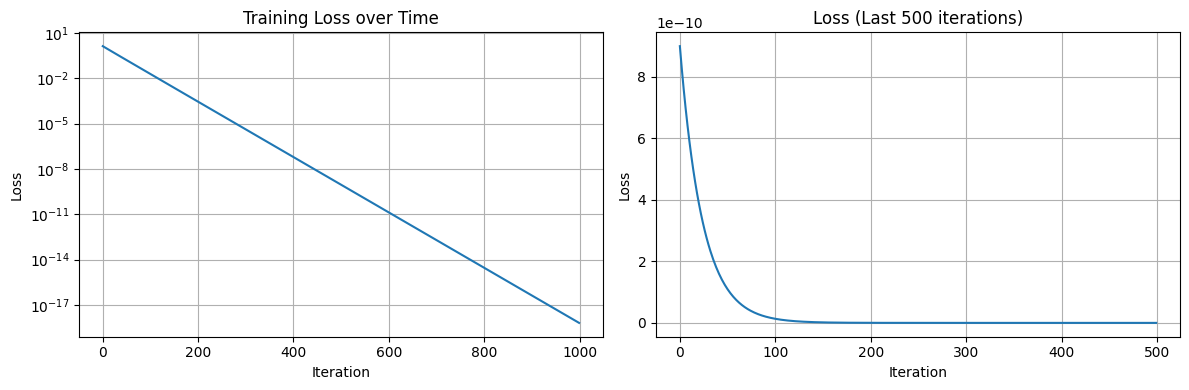

In [7]:
# Visualization: Loss curve
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss over Time')
plt.grid(True)
plt.yscale('log')

plt.subplot(1, 2, 2)
plt.plot(loss_history[-500:])
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss (Last 500 iterations)')
plt.grid(True)

plt.tight_layout()
plt.show()

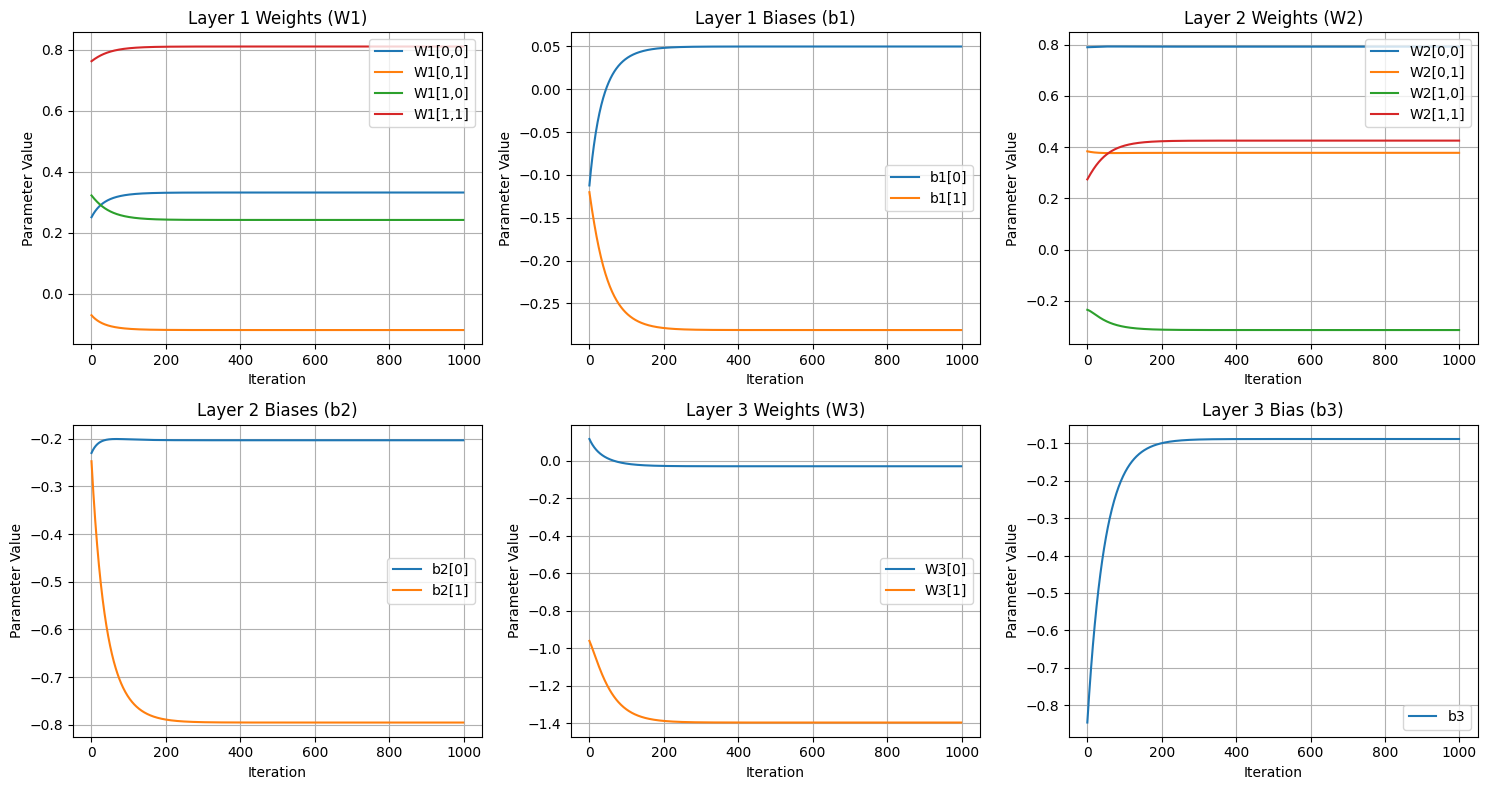

In [8]:
# Visualization: Parameter evolution
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# W1
axes[0, 0].plot(np.array(param_history['W1'])[:, 0, 0], label='W1[0,0]')
axes[0, 0].plot(np.array(param_history['W1'])[:, 0, 1], label='W1[0,1]')
axes[0, 0].plot(np.array(param_history['W1'])[:, 1, 0], label='W1[1,0]')
axes[0, 0].plot(np.array(param_history['W1'])[:, 1, 1], label='W1[1,1]')
axes[0, 0].set_title('Layer 1 Weights (W1)')
axes[0, 0].legend()
axes[0, 0].grid(True)

# b1
axes[0, 1].plot(np.array(param_history['b1'])[:, 0], label='b1[0]')
axes[0, 1].plot(np.array(param_history['b1'])[:, 1], label='b1[1]')
axes[0, 1].set_title('Layer 1 Biases (b1)')
axes[0, 1].legend()
axes[0, 1].grid(True)

# W2
axes[0, 2].plot(np.array(param_history['W2'])[:, 0, 0], label='W2[0,0]')
axes[0, 2].plot(np.array(param_history['W2'])[:, 0, 1], label='W2[0,1]')
axes[0, 2].plot(np.array(param_history['W2'])[:, 1, 0], label='W2[1,0]')
axes[0, 2].plot(np.array(param_history['W2'])[:, 1, 1], label='W2[1,1]')
axes[0, 2].set_title('Layer 2 Weights (W2)')
axes[0, 2].legend()
axes[0, 2].grid(True)

# b2
axes[1, 0].plot(np.array(param_history['b2'])[:, 0], label='b2[0]')
axes[1, 0].plot(np.array(param_history['b2'])[:, 1], label='b2[1]')
axes[1, 0].set_title('Layer 2 Biases (b2)')
axes[1, 0].legend()
axes[1, 0].grid(True)

# W3
axes[1, 1].plot(np.array(param_history['W3'])[:, 0], label='W3[0]')
axes[1, 1].plot(np.array(param_history['W3'])[:, 1], label='W3[1]')
axes[1, 1].set_title('Layer 3 Weights (W3)')
axes[1, 1].legend()
axes[1, 1].grid(True)

# b3
axes[1, 2].plot(param_history['b3'], label='b3')
axes[1, 2].set_title('Layer 3 Bias (b3)')
axes[1, 2].legend()
axes[1, 2].grid(True)

for ax in axes.flat:
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Parameter Value')

plt.tight_layout()
plt.show()

In [9]:
# Print final results
print("\n" + "="*60)
print("TRAINING SUMMARY")
print("="*60)
print(f"Initial Loss: {loss_history[0]:.6f}")
print(f"Final Loss: {loss_history[-1]:.6f}")
print(f"Loss Reduction: {(1 - loss_history[-1]/loss_history[0])*100:.2f}%")
print(f"\nTarget: {y_target}")
final_prediction = network.forward(x_input)
print(f"Final Prediction: {final_prediction:.6f}")
print(f"Prediction Error: {abs(final_prediction - y_target):.6f}")


TRAINING SUMMARY
Initial Loss: 1.323064
Final Loss: 0.000000
Loss Reduction: 100.00%

Target: 1.0
Final Prediction: 1.000000
Prediction Error: 0.000000
